In [ ]:
# CMPSC_132 - Maze Project
# Devon Reed - 11/25/2019

import random
import matplotlib.pyplot as plt
import matplotlib.patches as pat

In [ ]:
class Stack: # Stack object
  def __init__(self):
    self.items = []

  def push(self, item):
    self.items.append(item)
  
  def pop(self):
    return self.items.pop()
  
  def height(self):
    return len(self.items)

In [ ]:
class Cell: # object for indivdual cell
  cell_pairs = {'N': 'S', 'S': 'N', 'E': 'W', 'W': 'E'} # pairs of cells that share walls

  def __init__(self, x, y):
    self.x, self.y = x, y # cell position
    self.walls = {'N': True, 'S': True, 'E': True, 'W': True} # initially cell has all four walls
    self.visited = False # has the cell been visited in the search for the solution

  def remove_wall(self, adjacent, direction):
    self.walls[direction] = False # removes wall in direction
    adjacent.walls[Cell.cell_pairs[direction]] = False # cell_pairs reverses dirction for shared wall

  def all_wall(self): # for generating a maze
    return all(self.walls.values()) # returns true if all walls are present

  def possible_directions(self): # for solving the maze returns list of directions that are reachable (no wall)
    pds = []
    for direction in self.walls:
      if not self.walls[direction]:
        pds.append(direction)
    return pds

In [ ]:
class Maze: # object for a collection of cells
  def __init__(self, n):
    self.size = n # size of maze in nxn
    self.cell_grid = [[Cell(x, y) for y in range(n)] for x in range(n)] # create n x n grid of walled cells
  
  def get_cell(self, x, y): # returns cell object at xy location in grid
    return self.cell_grid[x][y]

  def get_possible_adjs(self, cell): # building maze only checks for cells with full walls
    steps = [('N', (0, 1)), ('S', (0, -1)), ('E', (1, 0)), ('W', (-1, 0))]
    unvisited_adjacents = []
    for direction, (dx, dy) in steps:
      nx, ny = cell.x + dx, cell.y + dy
      if (0 <= nx < self.size) and (0 <= ny < self.size):
        adj = maze.get_cell(nx, ny)
        if adj.all_wall():
          unvisited_adjacents.append((direction, adj))
    return unvisited_adjacents

  def next_cells(self, cell, pos_dirs): # solving maze checks for cells with walls and visited bool
    steps = [('N', (0, 1)), ('S', (0, -1)), ('E', (1, 0)), ('W', (-1, 0))]
    next_moves = []
    for direction, (dx, dy) in steps:
      nx, ny = cell.x + dx, cell.y + dy
      if (0 <= nx < self.size) and (0 <= ny < self.size):
        adj = maze.get_cell(nx, ny)
        if (not adj.visited) and (direction in pos_dirs): # only difference
          next_moves.append((adj, direction))
    return next_moves

  def gen_maze(self): # generate maze by removing walls with a stack until all cells have been visited
    total_cells = self.size ** 2
    stack_o_cells = Stack()
    cells_visited = 1
    current_cell = self.get_cell(0, 0)

    while cells_visited < total_cells:
      adjacents = self.get_possible_adjs(current_cell)
      if not adjacents:
        current_cell = stack_o_cells.pop() # if no suitable adjacents pop the next stack and go back to start of loop
        continue
      direction, next_cell = random.choice(adjacents) # randomly choose next cell from adjacents
      current_cell.remove_wall(next_cell, direction)
      stack_o_cells.push(current_cell)
      current_cell = next_cell
      cells_visited += 1
    
  def graph_solve(self, x_finish, y_finish, x_start=0, y_start=0, plot_solution=False): # function that graphs the maze with and without a solution
    steps_inv = [('S', (0, 1)), ('N', (0, -1)), ('W', (1, 0)), ('E', (-1, 0))] # for ploting a maze from end to start
    current_cell = self.get_cell(x_start, y_start)
    path_stack = Stack()
    directions = Stack()
    directions.push('N') # initializing stack to avoid poping from stack len() = 0
    path_stack.push(current_cell) # initialize path stack with the starting cell

    fig, ax = plt.subplots(1, figsize=(12, 12)) # plotting maze with start and end patches
    plt.axis([0, self.size, 0, self.size])
    plt.gca().set_aspect('equal', adjustable='box')
    for y in range(self.size):
      for x in range(self.size):
        if self.cell_grid[x][y].walls['E']:
          plt.plot((x+1, x+1), (y, y+1), c='black', lw=2)
        if self.cell_grid[x][y].walls['N']:
          plt.plot((x, x+1), (y+1, y+1), c='black', lw=2)
    plt.plot((0, 0), (0, self.size), c='black', lw=2)
    plt.plot((0, self.size), (0, 0), c='black', lw=2)
    start = pat.Rectangle((x_start + 0.2, y_start + 0.2), .6, .6, color='g')
    finish = pat.Rectangle((x_finish - .8, y_finish - .8), .6, .6, color='r')
    ax.add_patch(start)
    ax.add_patch(finish)

    if plot_solution: # solve maze with 2 stacks one for a path and the other for directions to plot later
      while (path_stack.height != 0) or (directions.height !=0):
        current_cell = path_stack.pop()
        x = directions.pop()
        if (current_cell.x == x_finish -1 ) and (current_cell.y == y_finish - 1):
          break
        current_cell.visited = True
        possible_directions = current_cell.possible_directions()
        next_moves = self.next_cells(current_cell, possible_directions)
        if len(next_moves) != 0:
          next_cell, direction = random.choice(next_moves)
          directions.push(direction)
          directions.push(direction)
          path_stack.push(current_cell)
          path_stack.push(next_cell)
          continue
      
      current_x, current_y = x_finish - .5, y_finish - .5 # plot solution in reverse using a stack of directions
      for i in range(directions.height()):
        current_direction = directions.pop()
        for direction, (dx, dy) in steps_inv:
          if direction == current_direction:
            next_x, next_y = current_x + dx, current_y + dy
        plt.plot((current_x, next_x), (current_y, next_y), c='blue', lw=2)
        current_x, current_y = next_x, next_y
    plt.show()

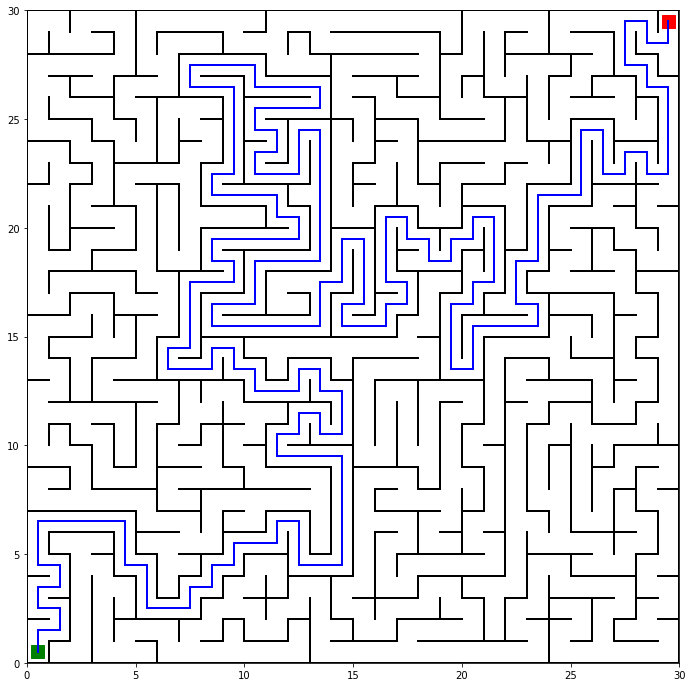

In [ ]:
maze = Maze(30)
maze.gen_maze()
maze.graph_solve(30, 30, plot_solution=True)